In [ ]:
# Install required R packages
install.packages("randomForest")
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:

# Load necessary libraries
library(randomForest)
library(caret)
library(pROC)


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin


Loading required package: lattice

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




In [ ]:
# Load corrplot library
library(corrplot)


In [ ]:
# Load the dataset
data <- read.csv("hotels.csv")

In [ ]:
# Ensure that data is a dataframe
data <- as.data.frame(data)

# Data Preprocessing
# Handle missing values
data <- na.omit(data)

In [ ]:
# Check for duplicates
duplicates <- duplicated(data)

# If you want to remove duplicates
data <- data[!duplicates, ]


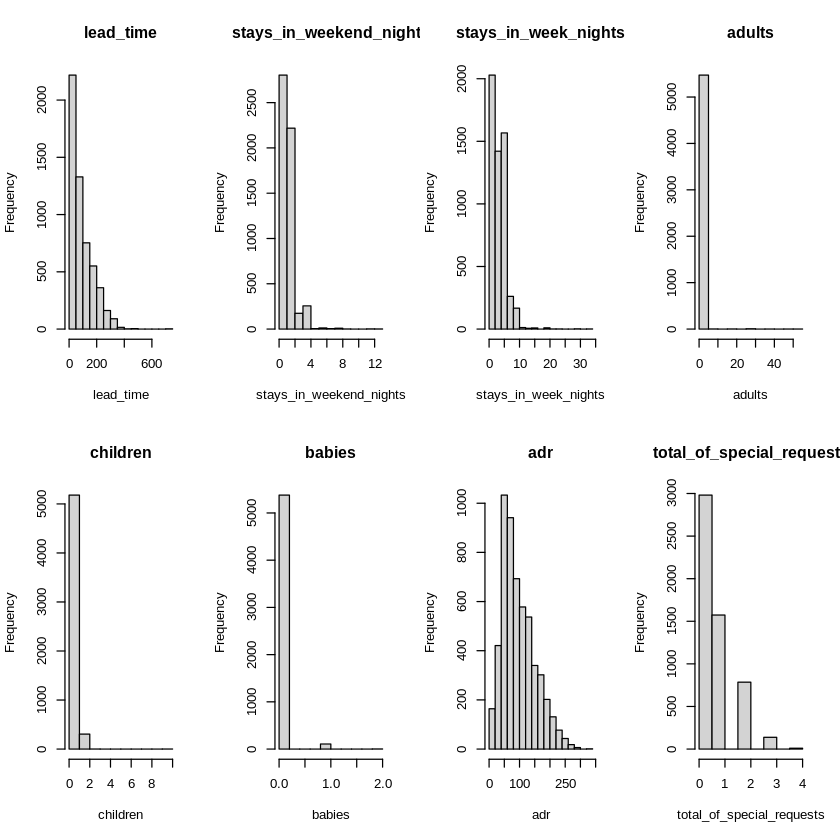

In [ ]:
# Plot histograms for numerical variables
num_vars <- c("lead_time", "stays_in_weekend_nights", "stays_in_week_nights", "adults", "children", "babies", "adr", "total_of_special_requests")
par(mfrow = c(2, 4))  # Set up a 2x4 grid for plots
for (var in num_vars) {
  hist(data[[var]], main = var, xlab = var)
}



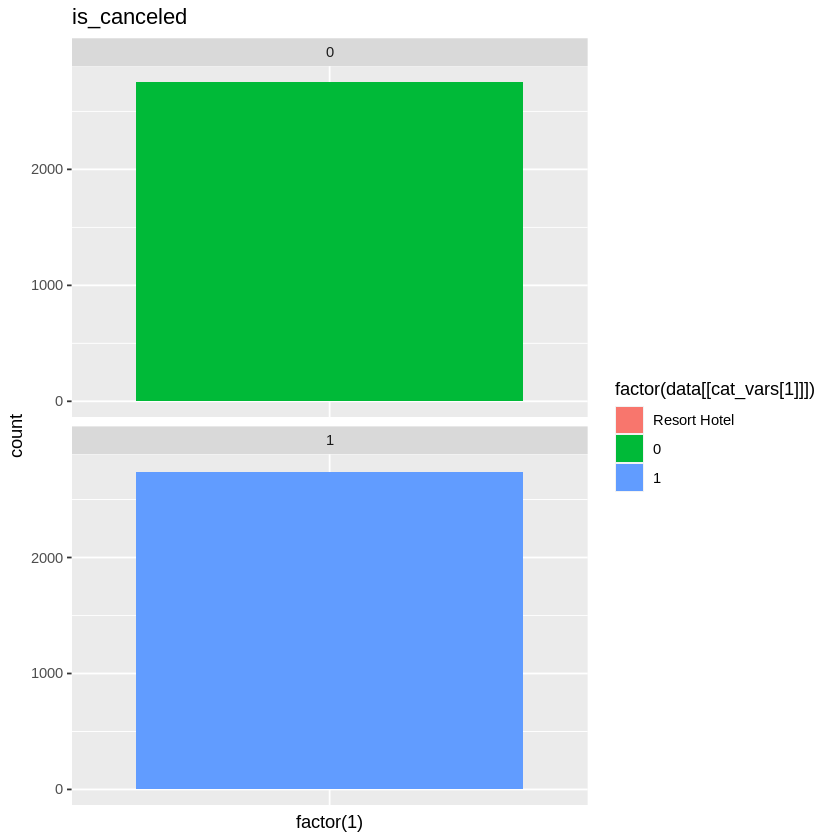

In [ ]:

# Plot bar plots for categorical variables
cat_vars <- c("hotel", "arrival_date_month", "meal", "market_segment", "distribution_channel", "reserved_room_type", "deposit_type", "customer_type", "is_canceled")

# Set up a single plot with facet_wrap for multiple plots
p <- ggplot(data, aes(x = factor(1), fill = factor(data[[cat_vars[1]]]))) +
  geom_bar() +
  facet_wrap(~ factor(data[[cat_vars[1]]]), nrow = 3) +
  labs(title = cat_vars[1]) +
  theme(axis.text.x = element_blank(), axis.ticks.x = element_blank())

for (var in cat_vars[-1]) {
  p <- p +
    geom_bar(data = data, aes(x = factor(1), fill = factor(data[[var]]))) +
    facet_wrap(~ factor(data[[var]]), nrow = 3) +
    labs(title = var) +
    theme(axis.text.x = element_blank(), axis.ticks.x = element_blank())
}

print(p)

In [ ]:
# Calculate correlation matrix
correlation_matrix <- cor(data[, num_vars])

# Print correlation matrix
print(correlation_matrix)

                             lead_time stays_in_weekend_nights
lead_time                  1.000000000              0.29164369
stays_in_weekend_nights    0.291643694              1.00000000
stays_in_week_nights       0.340554388              0.74071827
adults                     0.146415585              0.02780400
children                  -0.038087927              0.02090026
babies                     0.002016139              0.01207493
adr                       -0.135966888              0.03911277
total_of_special_requests  0.031170018              0.04214805
                          stays_in_week_nights        adults    children
lead_time                           0.34055439  0.1464155849 -0.03808793
stays_in_weekend_nights             0.74071827  0.0278039995  0.02090026
stays_in_week_nights                1.00000000  0.0155517123  0.01867428
adults                              0.01555171  1.0000000000  0.01414771
children                            0.01867428  0.0141477054  1.0000

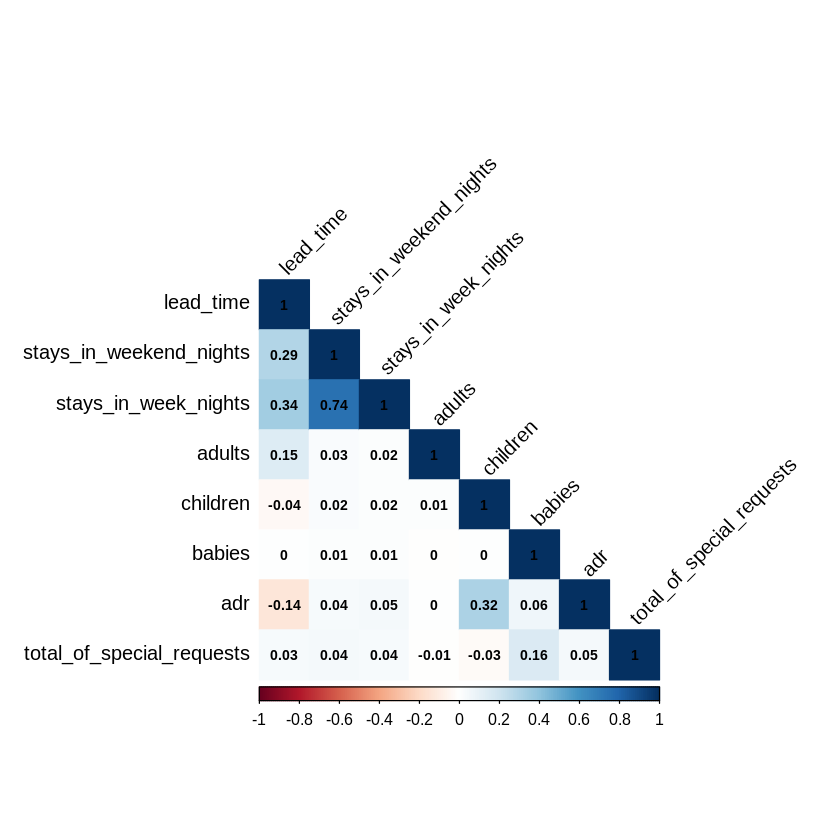

In [ ]:
# Plot correlation matrix
corrplot(correlation_matrix, method = "color", type = "lower",
         tl.col = "black", tl.srt = 45,
         addCoef.col = "black", number.cex = 0.7)

In [ ]:
# Feature Engineering (Example: Adding a new feature 'total_people' by summing 'adults', 'children', and 'babies')
data$total_people <- data$adults + data$children + data$babies

In [ ]:
# Selecting features (replace feature_names with actual column names)
selected_features <- c("lead_time", "stays_in_weekend_nights", "stays_in_week_nights", "adults", "children", "babies", "adr", "total_of_special_requests")

# Extract selected features and target variable
selected_data <- data[, c(selected_features, "is_canceled")]


In [ ]:
# Convert is_canceled to a factor and ensure valid variable names
selected_data$is_canceled <- factor(selected_data$is_canceled)
levels(selected_data$is_canceled) <- make.names(levels(selected_data$is_canceled))

# Split the data into features and target variable
X <- selected_data[, -which(names(selected_data) == "is_canceled")]
y <- selected_data$is_canceled

In [ ]:
# Split the data into training and testing sets
set.seed(123)  # For reproducibility
train_index <- createDataPartition(y, p = 0.8, list = FALSE)
X_train <- X[train_index, ]
X_test <- X[-train_index, ]
y_train <- y[train_index]
y_test <- y[-train_index]

In [ ]:
# Define a training control
ctrl <- trainControl(method = "cv", classProbs = TRUE)

In [ ]:
# Parameter Grid for tuning
param_grid <- expand.grid(mtry = c(2, 3, 4), ntree = c(100, 300, 500))

In [ ]:
# Model Selection and Training
model <- train(x = X_train, y = y_train, method = "rf", trControl = ctrl, ntree = 100, allowParallel = TRUE)


In [ ]:
# Predictions
y_pred <- predict(model, X_test)

In [ ]:
# Evaluate the model
accuracy <- confusionMatrix(data = y_pred, reference = y_test)$overall['Accuracy']
print(paste("Accuracy:", accuracy))

[1] "Accuracy: 0.753575924018766"


In [ ]:

# Save the trained model
saveRDS(model, "random_forest_model.rds")